In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np

wine = datasets.load_wine()

data = pd.DataFrame(data= wine['data'],
                    columns= wine['feature_names'])

y = wine['target']
print(y[:10])
data.head()

[0 0 0 0 0 0 0 0 0 0]


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y, 
                                                    test_size = 0.8,
                                                    random_state = 1234)

print(f'X train shape {X_train.shape} \nX test shape {X_test.shape}')

X train shape (35, 13) 
X test shape (143, 13)


In [3]:
X_train.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [4]:
data_na = X_train.copy()

for col in data_na.columns:
    data_na.loc[data_na.sample(frac=0.1).index, col] = np.nan

data_na.isna().sum()

alcohol                         4
malic_acid                      4
ash                             4
alcalinity_of_ash               4
magnesium                       4
total_phenols                   4
flavanoids                      4
nonflavanoid_phenols            4
proanthocyanins                 4
color_intensity                 4
hue                             4
od280/od315_of_diluted_wines    4
proline                         4
dtype: int64

In [5]:
#Univariate Imputation
from sklearn.impute import SimpleImputer

mode_imputer = SimpleImputer(strategy = 'most_frequent')

# For each column, make imputation
for column in data_na.columns:
    values = data_na[column].values.reshape(-1,1)
    mode_imputer.fit(values)
    data_na[column] = mode_imputer.transform(values)

# Check Nas
data_na.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [6]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer 

data_na = X_train.copy()

# Generate new nas
for col in data_na.columns:
    data_na.loc[data_na.sample(frac=0.1).index, col] = np.nan

# Create imputer
iter_imputer = IterativeImputer(max_iter=15, random_state=1234)

# Transform data
iter_imputer_fit = iter_imputer.fit(data_na.values) 
imputed_data = iter_imputer_fit.transform(data_na)

pd.DataFrame(imputed_data, columns = data_na.columns)\
    .isna()\
    .sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [7]:
from sklearn.impute import KNNImputer

data_na = X_train.copy()

# Generate new nas
for col in data_na.columns:
    data_na.loc[data_na.sample(frac=0.1).index, col] = np.nan

# Select k
k = int(np.round(np.sqrt(data_na.shape[0])))

# Create imputer
knn_imputer = KNNImputer(n_neighbors=k)

# Transform data
knn_imputer_fit = knn_imputer.fit(data_na.values)

imputed_data = knn_imputer_fit.transform(data_na)

pd.DataFrame(imputed_data, columns = data_na.columns)\
    .isna()\
    .sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [8]:
X_train.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,12.904857,2.160000,2.371143,19.174286,98.428571,2.324000,2.072286,0.364571,1.660000,4.777143,0.996857,2.635714,757.714286
std,0.879199,1.026805,0.311974,3.675142,13.560942,0.614411,0.982162,0.135914,0.688699,2.190065,0.250103,0.645907,361.713778
min,11.030000,0.900000,1.710000,12.000000,80.000000,0.980000,0.340000,0.140000,0.410000,1.900000,0.570000,1.330000,278.000000
25%,12.270000,1.555000,2.110000,16.050000,90.000000,1.900000,1.280000,0.270000,1.260000,3.285000,0.870000,2.145000,447.000000
50%,13.030000,1.800000,2.390000,19.000000,98.000000,2.350000,2.240000,0.320000,1.540000,4.400000,0.960000,2.710000,640.000000
75%,13.630000,2.540000,2.635000,21.000000,102.500000,2.800000,2.865000,0.490000,2.075000,5.790000,1.185000,3.145000,1057.500000
max,14.380000,5.040000,2.920000,28.500000,151.000000,3.850000,3.640000,0.630000,2.960000,13.000000,1.710000,3.640000,1547.000000


array([[<AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'malic_acid'}>,
        <AxesSubplot:title={'center':'ash'}>,
        <AxesSubplot:title={'center':'alcalinity_of_ash'}>],
       [<AxesSubplot:title={'center':'magnesium'}>,
        <AxesSubplot:title={'center':'total_phenols'}>,
        <AxesSubplot:title={'center':'flavanoids'}>,
        <AxesSubplot:title={'center':'nonflavanoid_phenols'}>],
       [<AxesSubplot:title={'center':'proanthocyanins'}>,
        <AxesSubplot:title={'center':'color_intensity'}>,
        <AxesSubplot:title={'center':'hue'}>,
        <AxesSubplot:title={'center':'od280/od315_of_diluted_wines'}>],
       [<AxesSubplot:title={'center':'proline'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

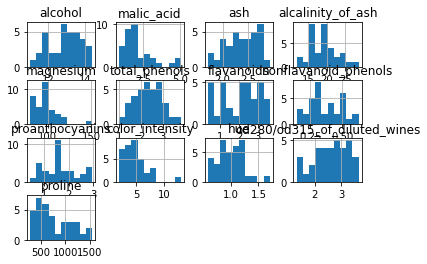

In [9]:
%matplotlib inline
X_train.hist()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (35). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (35). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


(array([4., 4., 3., 3., 3., 3., 4., 4., 3., 4.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

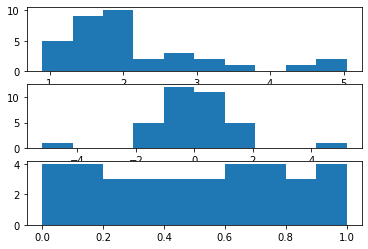

In [10]:
from sklearn import preprocessing
import matplotlib.pyplot as plt

quantile_transf_norm =  preprocessing.QuantileTransformer(output_distribution= 'normal')
quantile_transf_uniform =  preprocessing.QuantileTransformer(output_distribution= 'uniform')

data_to_transform = X_train['malic_acid'].values.reshape(-1,1)
transformed_data_normal =  quantile_transf_norm.fit_transform(data_to_transform)
transformed_data_uniform =  quantile_transf_uniform.fit_transform(data_to_transform)

# Create plots
fig, axs = plt.subplots(3)

axs[0].hist(X_train['malic_acid'].values)
axs[1].hist(transformed_data_normal)
axs[2].hist(transformed_data_uniform)

In [11]:
# Create the scaler
stand_scale = preprocessing.StandardScaler()
normal_scale = preprocessing.MinMaxScaler()

# Fit the scaler
stand_scale_fit = stand_scale.fit(X_train)
normal_scale_fit = normal_scale.fit(X_train)

# Apply the scaler to train
X_train_scale = stand_scale_fit.transform(X_train)
X_train_norm = normal_scale_fit.transform(X_train)

# Apply the scaler to test
X_test_scale = stand_scale_fit.transform(X_test)
X_test_norm = normal_scale_fit.transform(X_test)

# Convert data to DataFrame
X_train_scale = pd.DataFrame(X_train_scale, columns = data_na.columns)
X_train_norm = pd.DataFrame(X_train_norm, columns = data_na.columns)

# Check Standardization
standard_sd =  X_train_scale['malic_acid'].std()
standard_mean = X_train_scale['malic_acid'].mean()
normalized_min =  X_train_norm['malic_acid'].min()
normalized_max = X_train_norm['malic_acid'].max()

print(f'Standardized data has SD of {np.round(standard_sd)} and mean of {np.round(standard_mean)}')
print(f'Normalized data has Min of {normalized_min} and max of {normalized_max}')

Standardized data has SD of 1.0 and mean of -0.0
Normalized data has Min of 0.0 and max of 1.0


In [12]:
label = np.array(['USA','Australia', 'UK', 'UK','USA','Australia','USA',
                  'UK', 'UK','UK','Australia'])

label

array(['USA', 'Australia', 'UK', 'UK', 'USA', 'Australia', 'USA', 'UK',
       'UK', 'UK', 'Australia'], dtype='<U9')

In [13]:
from sklearn.preprocessing import OneHotEncoder

# Create encoder
ohencoder = OneHotEncoder(drop='first')

# Fit the encoder
ohencoder_fit = ohencoder.fit(label.reshape(-1,1))

# Transform the data
ohencoder_fit.transform(label.reshape(-1,1)).toarray()

array([[0., 1.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.]])

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


## -- Logistic Regression -- ##

# Create the model
log_reg = LogisticRegression(penalty = 'none')

# Train the model
log_reg_fit = log_reg.fit(X_train, y_train)

# Make prediction
y_pred_log_reg = log_reg_fit.predict(X_test)


## -- Random Forest -- ##

# Create the model
rf_class = RandomForestClassifier()

# Train the model
rf_class_fit = rf_class.fit(X_train, y_train)

# Make prediction
y_pred_rf_class = rf_class_fit.predict(X_test)

print(f'Logistic Regression predictions {y_pred_log_reg[:5]}')
print(f'Random Forest predictions {y_pred_rf_class[:5]}')

Logistic Regression predictions [1 1 1 0 0]
Random Forest predictions [1 1 1 1 2]


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

print('##-- Logistic Regression --## ')
print(f'Acuraccy: {accuracy_score(y_test, y_pred_log_reg)}')
print(f'Precision: {precision_score(y_test, y_pred_log_reg, average="macro")}')
print(f'Recall: {recall_score(y_test, y_pred_log_reg, average="macro")}')
print(confusion_matrix(y_test, y_pred_log_reg))


print('\n##-- Random Forest --## ')
print(f'Acuraccy: {accuracy_score(y_test, y_pred_rf_class)}')
print(f'Precision: {precision_score(y_test, y_pred_rf_class, average="macro")}')
print(f'Recall: {recall_score(y_test, y_pred_rf_class, average="macro")}')
print(confusion_matrix(y_test, y_pred_rf_class))